# <a id="2"></a>
<h1 style="background-color:#2eddc6;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">Stroke Notebook </h1>

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Data Overview</h3>

**According to the World Health Organization (WHO) :**  
stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

|               Column               |                                            Description                                             |
|:----------------------------------:|:--------------------------------------------------------------------------------------------------:|
|               Gender               |                              Male or female (Nominal)                                              |
|                Age                 |                              Age of the patient (Continuous)                                       |
|           Hypertension             |        Whether or not the patient has hypertension (Nominal: "Yes", "No")                         |
|           Heart Disease            |        Whether or not the patient has heart disease (Nominal: "Yes", "No")                        |
|           Ever Married             |        Whether or not the patient has ever been married (Nominal: "Yes", "No")                    |
|             Work Type              |        Type of occupation (Nominal: "Private", "Self-employed", "Govt_job", "children", "Never_worked") |
|           Residence Type           |        Type of residence (Nominal: "Urban", "Rural")                                              |
|        Avg Glucose Level          |        Average glucose level in blood (Continuous)                                                 |
|                BMI                |                              Body Mass Index (Continuous)                                          |
|           Smoking Status           |        Smoking status (Nominal: "formerly smoked", "never smoked", "smokes", "unknown")           |
|              Stroke                |        Whether the patient had a stroke (Binary: "1" means "Yes", "0" means "No")                 |

# <a id="2"></a>
<h1 style="background-color:#c5f6ef;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Medical Background </h1>

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Cardiovascular systemt</h3>

The cardiovascular system, also known as the circulatory system, is a vital network of organs, vessels, and tissues responsible for transporting blood, oxygen, nutrients, and waste products throughout the body. It plays a crucial role in maintaining homeostasis and supporting various bodily functions. The key components of the cardiovascular system include the heart, blood vessels, and blood.

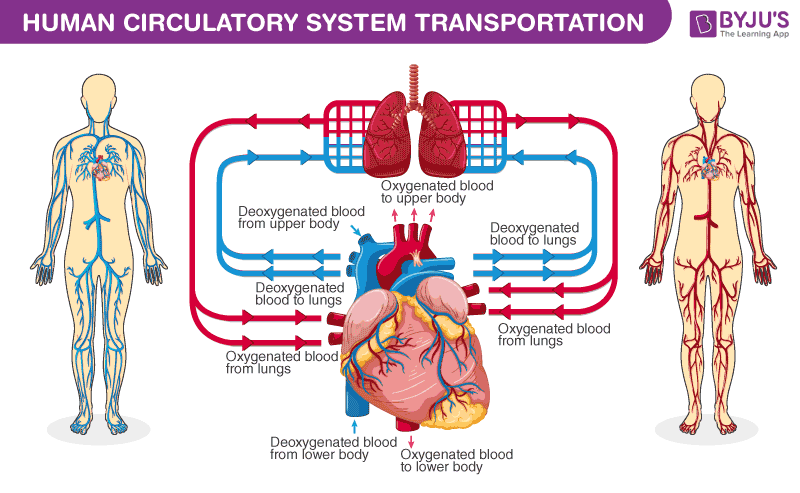

In [4]:
from IPython.display import Image
Image(filename='Human-Circulatory-System-Transportation.png',width=900,height=400)

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Ischemic Stroke</h3>


Ischemic strokes are the most common type, accounting for about 87% of all strokes. They occur when blood vessels supplying blood to the brain become narrowed or blocked, leading to severely reduced blood flow (ischemia).

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Hemorrhagic Stroke</h3>


Hemorrhagic strokes occur when a blood vessel in the brain bursts or leaks. This results in bleeding into or around the brain, creating pressure and damage to brain cells.

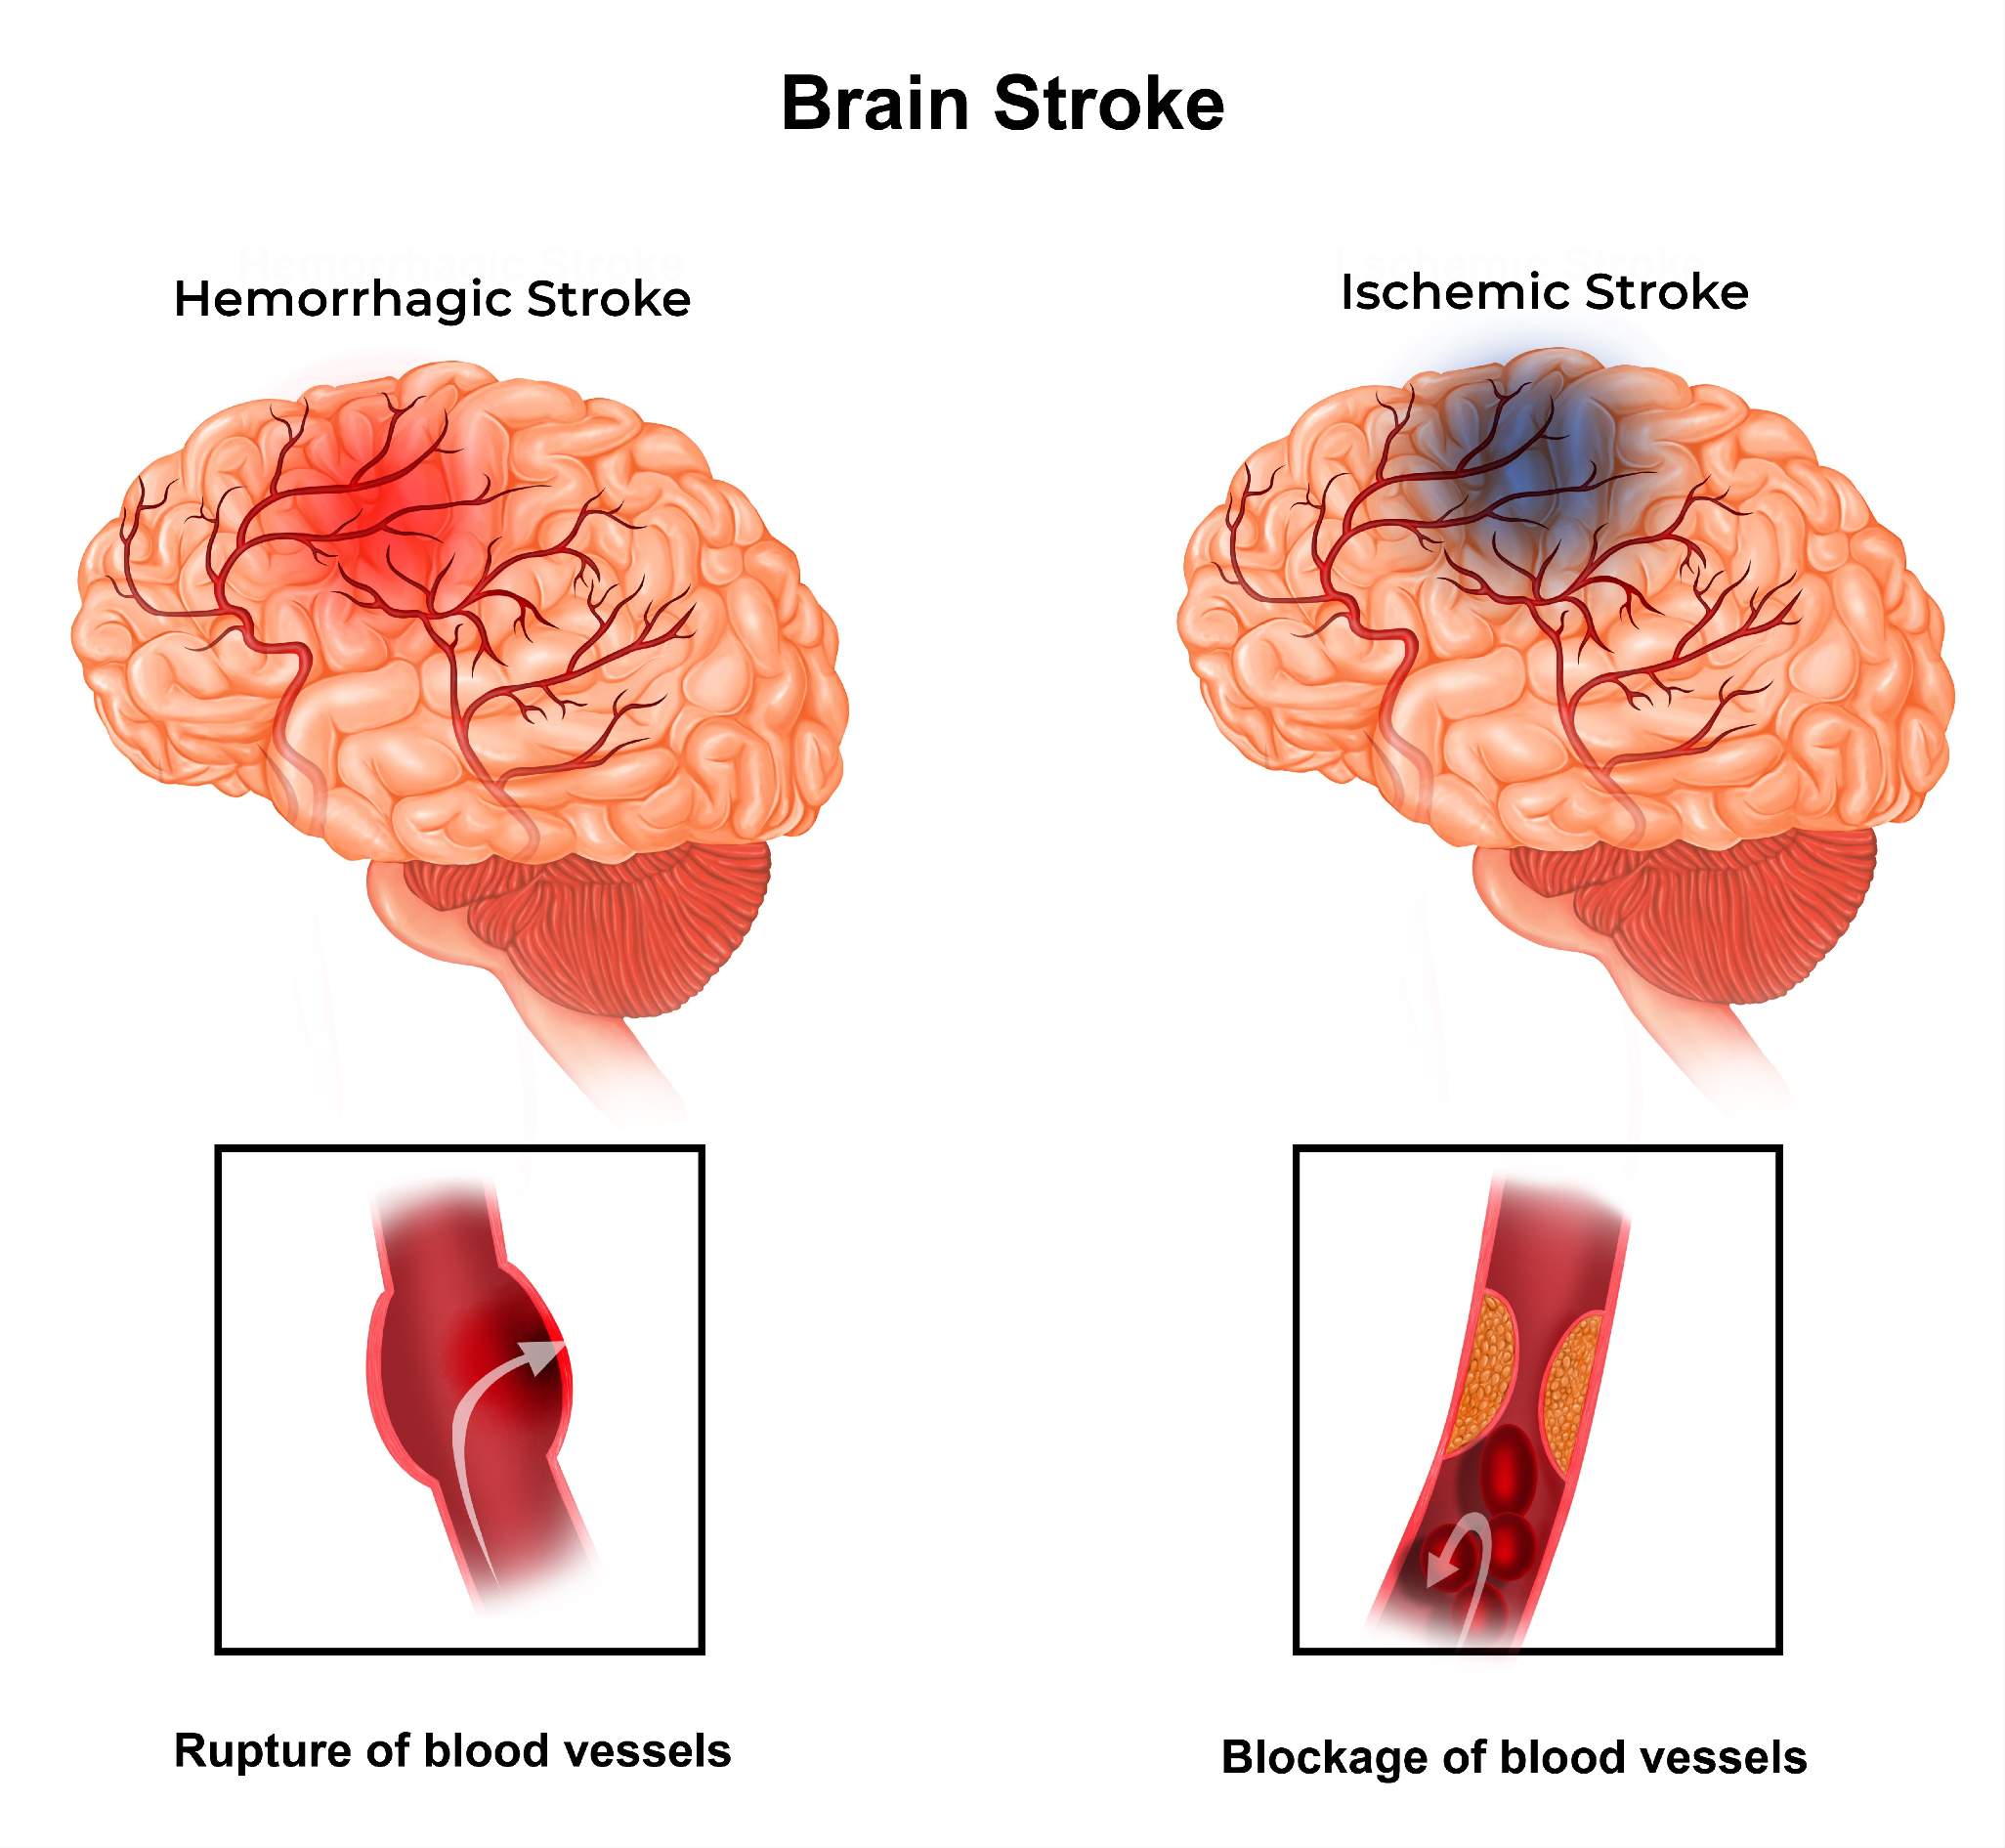

In [142]:
Image(filename='Strokes.png',width=900,height=400)

# <a id="2.1"></a>
<h3 style="background-color:#c5f6ef;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Libraries & loading the data</h3>

In [5]:
pip install missingno

In [198]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import scipy.stats as stats
from scipy.stats import chi2_contingency

In [222]:
df = pd.read_csv("Stroke.csv")

# <a id="2.1"></a>
<h3 style="background-color:#c5f6ef;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Exploratory Data Analysis</h3>

In [223]:
print(f'No. of records are {df.shape[0]}')
print(f'No. of columns are {df.shape[1]}')

No. of records are 5110
No. of columns are 12


In [224]:
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [225]:
column = list(df.columns)
categorical_features = []
discrete_features = []

for i in column:
    if len(df[i].unique()) > 6:
        discrete_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Continous Features :',*discrete_features)

Categorical Features : gender hypertension heart_disease ever_married work_type Residence_type smoking_status stroke
Continous Features : id age avg_glucose_level bmi


In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [227]:
round(df.describe())

id     age  hypertension  heart_disease  avg_glucose_level  \
count   5110.0  5110.0        5110.0         5110.0             5110.0   
mean   36518.0    43.0           0.0            0.0              106.0   
std    21162.0    23.0           0.0            0.0               45.0   
min       67.0     0.0           0.0            0.0               55.0   
25%    17741.0    25.0           0.0            0.0               77.0   
50%    36932.0    45.0           0.0            0.0               92.0   
75%    54682.0    61.0           0.0            0.0              114.0   
max    72940.0    82.0           1.0            1.0              272.0   

          bmi  stroke  
count  4909.0  5110.0  
mean     29.0     0.0  
std       8.0     0.0  
min      10.0     0.0  
25%      24.0     0.0  
50%      28.0     0.0  
75%      33.0     0.0  
max      98.0     1.0

In [228]:
# Remove duplicates if any
df.drop_duplicates(inplace=True)

In [229]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [230]:
##Deleting ID column
df = df.drop('id', axis=1)

In [231]:
df.drop(df[df["gender"]=="Other"].index,axis=0,inplace=True)

In [232]:
df.head()

gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             202.21   NaN     never smoked       1  
2          Rural             105.92  32.5     never smoked       1  
3          Urban             171.23  34.4           smokes       1  
4          Rural             174.12  24.0     never smoked       1

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Target distribution</h3>

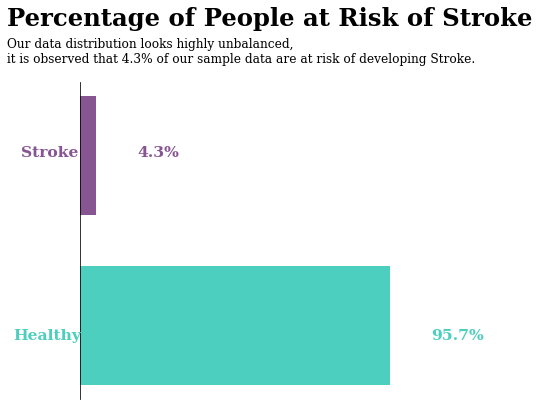

In [18]:
# let us overview the distribution of the target of our data
x = pd.DataFrame(df.groupby(['stroke'])['stroke'].count())

# Plot
fig, ax = plt.subplots(figsize=(6, 6), dpi=70)
ax.barh([1], x.stroke[1], height=0.7, color='#875692')
plt.text(-1050, -0.08, 'Healthy', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'style': 'normal', 'color': '#4ccfbe'})
plt.text(5500, -0.08, '95.7%', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'color': '#4ccfbe'})
ax.barh([0], x.stroke[0], height=0.7, color='#4ccfbe')
plt.text(-930, 1, 'Stroke', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'style': 'normal', 'color': '#875692'})
plt.text(900, 1, '4.3%', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'color': '#875692'})

fig.patch.set_facecolor('white')
ax.set_facecolor('white')

plt.text(-1150, 1.77, 'Percentage of People at Risk of Stroke', {'font': 'Serif', 'size': '25', 'weight': 'bold', 'color': 'black'})
plt.text(-1150, 1.55, 'Our data distribution looks highly unbalanced,\nit is observed that 4.3% of our sample data are at risk of developing Stroke.',
         {'font': 'Serif', 'size': '12.5', 'color': 'black'})

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

From distribution it is clear that **only every 4 people out of 100 people have develpoed Stroke from our sampling data**. So this this appears as a highly **unbalanced data distribution**, and null accuracy score of this distribution it self is 96%, whcih imploys any dump model should randomly predictions of stroke could reach accuracy of 96%. So, while modeling and training data, **over sampling and under sampling** have to be done to obtain good and reliable results.

# <a id="2.1"></a>
<h3 style="background-color:#c5f6ef;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Dealing With Null Values</h3>

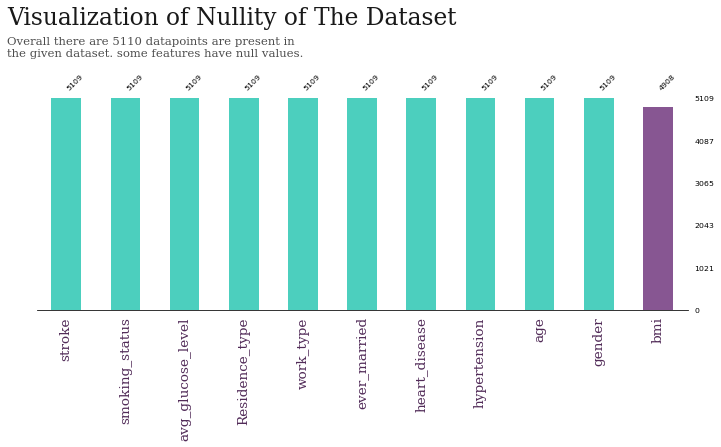

In [19]:
import missingno as msno

color = ['#4ccfbe','#4ccfbe','#4ccfbe','#4ccfbe','#4ccfbe','#4ccfbe','#4ccfbe','#4ccfbe','#4ccfbe','#4ccfbe','#875692']
fig, ax = plt.subplots(figsize = (12,4), dpi = 70)
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

msno.bar(df, sort = 'descending', 
         color = color, 
         ax = ax, fontsize =8,
         labels = 'off', filter = 'top')

ax.text(-1,1.35,'Visualization of Nullity of The Dataset',{'font': 'serif', 'size': 24,  'color':'black'},alpha = 0.9)
ax.text(-1,1.2,'Overall there are 5110 datapoints are present in \nthe given dataset. some features have null values.',{'font': 'serif', 'size': 12,  'color':'black'}, alpha = 0.7)

ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, 
                   ha = 'center', **{'font': 'serif', 'size': 14,'weight':'normal','color':'#512b58'}, alpha = 1)
ax.set_yticklabels('')
ax.spines['bottom'].set_visible(True)

plt.show()

**How can we deal with blanks in our data?**

There are many ways. One can simply drop these records, fill the blanks with the mean, the median, or even simply the record before or after the missing value.


In [133]:
df['bmi'].median()

28.1

In [233]:
df.loc[df.bmi.isnull(), 'bmi'] = df['bmi'].median()

**All null values have been filled**

In [22]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [23]:
df.to_csv("updated_Stroke.csv")

# <a id="2.1"></a>
<h3 style="background-color:#c5f6ef;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Data Visualization Functions</h3>

There are many different types of graphs, each with its own unique properties and applications. 

We will use :

   1- **Pie plot** : for **Categorical data**
   
   2- **KDE plot** (kernel density estimation plot) : for **Numerical data**
   
   3- **Box Plot** : for **definition of outliers in numerical data**
   
   4- **Histogram** : for **distribution of numerical data**

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Catigorical data</h3>

In [24]:
def pie_plot(df, group_feature, overall_title, colors):
    # Calculate percentage of each category in the group feature
    grouped = df[group_feature].value_counts(normalize=True).rename('percentage').mul(100).reset_index()

    with plt.style.context('fivethirtyeight'):
        fig, ax = plt.subplots(figsize=(8, 6))

        wedges, texts, autotexts = ax.pie(grouped['percentage'], labels=grouped['index'],
                                           autopct='%1.1f%%', colors=colors)
        ax.set_title(f'Distribution of {overall_title}')  # Set the title to be the group feature
        plt.setp(autotexts, size=16, color="w")

        plt.tight_layout()
        plt.show()
        

In [50]:
def pie_with_target(df, group_feature, overall_title):
    # Calculate percentage of people who developed Stroke for each group
    grouped = df.groupby(group_feature)['stroke'].value_counts(normalize=True).rename('percentage').mul(100).reset_index()

    # Define custom color palette
    custom_palette = {0: '#4ccfbe', 1: '#875692'}
    # Define custom legend labels
    legend_labels = {0: 'Healthy', 1: 'Stroke'}

    unique_groups = grouped[group_feature].unique()
    num_unique_groups = len(unique_groups)

    # Ensure all Stroke statuses are in custom_palette and legend_labels
    assert set(grouped['stroke'].unique()).issubset(custom_palette.keys()), "All stroke statuses must be keys in custom_palette"
    assert set(grouped['stroke'].unique()).issubset(legend_labels.keys()), "All stroke statuses must be keys in legend_labels"

    with plt.style.context('fivethirtyeight'):
        fig, axs = plt.subplots(1, num_unique_groups, figsize=(15, 6))

        if num_unique_groups == 1:
            axs = [axs]  # To handle the case where there is only 1 group

        for i, group_status in enumerate(unique_groups):
            data = grouped[grouped[group_feature]== group_status ]
            labels = data['stroke'].map(legend_labels).tolist() # map stroke status to labels
            colors = data['stroke'].map(custom_palette).tolist() # map stroke status to colors
            wedges, texts, autotexts = axs[i].pie(data['percentage'], labels=labels, colors=colors, autopct='%1.1f%%')

            axs[i].set_title(f'{group_status}')  # Set the title to be the group feature and status
            plt.setp(autotexts, size=16, color="w")
        
        
        fig.suptitle(f'Percentage of people who developed Stroke grouped by {overall_title} status', fontsize=18)
        plt.tight_layout()
        plt.show()
        

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Continuous data</h3>

In [26]:
def plot_distribution(df, feature, plot_title):
    with plt.style.context('fivethirtyeight'):
        fig, ax = plt.subplots(1, 2, figsize=(20, 5))

        # Histogram
        sns.histplot(x=feature,
                     data=df, 
                     ax=ax[0],
                     linewidth=0.8,
                     color='#4ccfbe',
                     bins=20).set_title(f"Distribution of {plot_title}")
        ax[0].set_xlabel(plot_title)

        # Box plot for the entire distribution
        sns.boxplot(x=feature,
                    data=df,
                    linewidth=1.5,
                    width=0.5,
                    color='#4ccfbe',
                    ax=ax[1]).set_title(f"Box Plot of {plot_title}")
        ax[1].set_xlabel(plot_title)

        plt.show()

In [111]:
df['stroke'] = df['stroke'].map({1: 'Stroke', 0: 'Healthy'})
def plot_stroke_vs_Healthy(feature, plot_title, df = df):
    box_plots_colors = {'Healthy': '#4ccfbe', 'Stroke':'#875692'}
    
    with plt.style.context('fivethirtyeight'):
        fig, ax = plt.subplots(1, 2, figsize=(20, 5))

        # KDE plot for Stroke vs Healthy
        sns.kdeplot(data=df[df['stroke']=='Stroke'], x=feature, color='#875692', fill=True, linewidth=1.5, ec='black', alpha=0.8, zorder=3, ax=ax[0])
        sns.kdeplot(data=df[df['stroke']=='Healthy'], x=feature, color='#4ccfbe', fill=True, linewidth=1.5, ec='black', alpha=0.8, zorder=3, ax=ax[0])

        ax[0].set_title(f"KDE Plot of {plot_title} by Stroke")
        ax[0].set_xlabel(plot_title)
        ax[0].set_ylabel('Density')

        # Box plot for Stroke vs Healthy
        sns.boxplot(x=feature,
                    data=df,
                    y="stroke",
                    linewidth=1.5,
                    palette=box_plots_colors,
                    ax=ax[1]).set_title(f"Distribution of {plot_title} by Stroke")
        ax[1].set_xlabel(plot_title)
        ax[1].set_ylabel('Stroke')

        plt.show()

# <a id="2.2"></a>
<h3 style="background-color:#c5f6ef;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Feature Statistics Functions</h3>

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Catigorical data</h3>

In [29]:
def explore_categorical_variable(feature, data = df):
    # Extract the column from the dataset
    column = data[feature]
    
    # Data type
    data_type = column.dtype
    
    # Count of each category
    count = column.count()
    
    # Mode (most frequent category)
    mode = column.mode().iloc[0]
    
    unique_values = column.nunique()
    
    # Create a DataFrame to store the results
    results_df = pd.DataFrame({
        'Statistics': ['Data Type', 'Count', 'Mode', 'Num of Possible values'],
        'Values': [data_type, count,  mode , unique_values ]
    })
    
    # Remove the index column
    results_df = results_df.reset_index(drop=True)
    
    return results_df

In [30]:
def explore_categories(feature_name, category_names, data=df):
    
    # Extract the column from the dataset
    column = data[feature_name]

    # Data type
    data_type = str(column.dtype)

    # Count of each category
    category_counts = column.value_counts()

    # Percentage of each category
    category_percentages = {category: count / column.count() * 100 for category, count in category_counts.items()}

    # Create a DataFrame for count, percentage, data type, and mode
    result_df = pd.DataFrame({
        f'{feature_name}': category_counts.index,
        'Count': category_counts.values,
        'Percentage': [category_percentages.get(category, 0) for category in category_counts.index],
    })

    # Formatting for Percentage column
    result_df['Percentage'] = result_df['Percentage'].round(2)

    return result_df

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Continuous data</h3>

In [31]:
def explore_continuous_variable(feature, data=df):
    # Extract the column from the dataset
    column = data[feature]
    
    # Data type
    data_type = column.dtype
    
    # Basic statistics
    minimum = int(column.min())
    maximum = int(column.max())
    data_range = maximum - minimum
    mean = round(column.mean())
    median = int(column.median())
    q3 = int(column.quantile(0.75))
    q1 = int(column.quantile(0.25))
    iqr = q3 - q1
    variance = round(column.var(), 2)
    std_deviation = round(column.std(), 2)
    coefficient_of_variation = round(np.sqrt(variance) / mean, 2)
    skewness = round(column.skew(), 2)
    
    # Percentiles
    percentiles = column.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])
    
    # Number of null values
    num_null_values = column.isnull().sum()
    
    # Calculate outliers based on IQR
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers_percentage = round(((column < lower_bound) | (column > upper_bound)).mean() * 100, 2)
    
    # Create a DataFrame to store the results
    results_df = pd.DataFrame({
        'Statistics': ['Feature', 'Data Type', 'Minimum Value', 'Maximum Value', 'Range', 'Mean', 'Median', 'Q3', 'Q1',
                       'IQR', 'Outliers Percentage', 'Variance', 'Standard Deviation', 'Coefficient of Variation', 'Skewness',
                       '10th Percentile', '25th Percentile', '50th Percentile', '75th Percentile', '90th Percentile',
                       'Number of Null Values','Lower Band' , 'Upper Band'],
        'Values': [feature, data_type, minimum, maximum, data_range, mean, median, q3, q1, iqr, outliers_percentage, variance, std_deviation,
                   coefficient_of_variation, skewness, int(percentiles['10%']), int(percentiles['25%']),
                   int(percentiles['50%']), int(percentiles['75%']), int(percentiles['90%']), num_null_values , lower_bound , upper_bound  
                   ]
    })
    
    results_df = results_df.reset_index(drop=True)
    
    # Create a Styler object
    styled_df = results_df.style.set_properties(**{'text-align': 'center'})
    
    return styled_df

In [135]:
def compare_feature_statistics(feature, data=df):
    # Extract the column for Stroke and Healthy individuals
    stroke_column = data[data['stroke'] == 1][feature]
    healthy_column = data[data['stroke'] == 0][feature]

    # Basic statistics for Stroke
    stroke_mean = int(stroke_column.mean())
    stroke_median = int(stroke_column.median())
    stroke_std_deviation = round(stroke_column.std(), 2)
    stroke_min = int(stroke_column.min())
    stroke_max = int(stroke_column.max())
    stroke_iqr = int(stroke_column.quantile(0.75) - stroke_column.quantile(0.25))

    # Basic statistics for Healthy
    healthy_mean = int(healthy_column.mean())
    healthy_median = int(healthy_column.median())
    healthy_std_deviation = round(healthy_column.std(), 2)
    healthy_min = int(healthy_column.min())
    healthy_max = int(healthy_column.max())
    healthy_iqr = int(healthy_column.quantile(0.75) - healthy_column.quantile(0.25))

    # Create a DataFrame to store the results
    results_df = pd.DataFrame({
        'Statistics': ['Mean', 'Median', 'Std Deviation', 'Min', 'Max', 'IQR'],
        'Stroke': [stroke_mean, stroke_median, stroke_std_deviation, stroke_min, stroke_max, stroke_iqr],
        'Healthy': [healthy_mean, healthy_median, healthy_std_deviation, healthy_min, healthy_max, healthy_iqr]
    })

    results_df = results_df.set_index('Statistics')
    
    results_df = results_df.astype(int)

    # Create a Styler object
    styled_df = results_df.style.set_properties(**{'text-align': 'center'})

    return styled_df

# <a id="2.1"></a>
<h3 style="background-color:#c5f6ef;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Features</h3>

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Gender</h3>

**Male or Female**

In [33]:
explore_categorical_variable('gender')

Statistics  Values
0               Data Type  object
1                   Count    5109
2                    Mode  Female
3  Num of Possible values       2

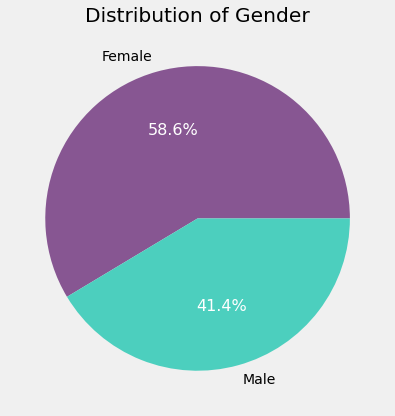

In [35]:
pie_plot(df, 'gender', 'Gender', colors=['#875692','#4ccfbe'])

In [36]:
explore_categories('gender',['male','female'])

gender  Count  Percentage
0  Female   2994        58.6
1    Male   2115        41.4

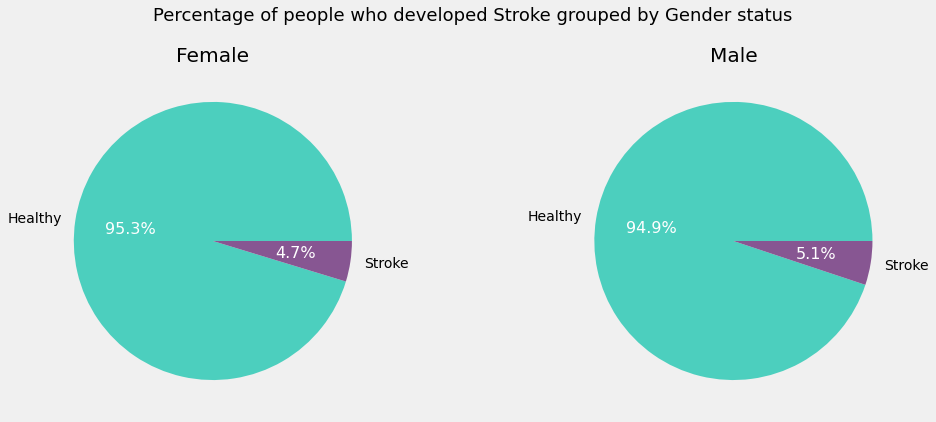

In [51]:
pie_with_target(df, 'gender', 'Gender')

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Age</h3>

**Age of the patient**

In [52]:
explore_continuous_variable('age')

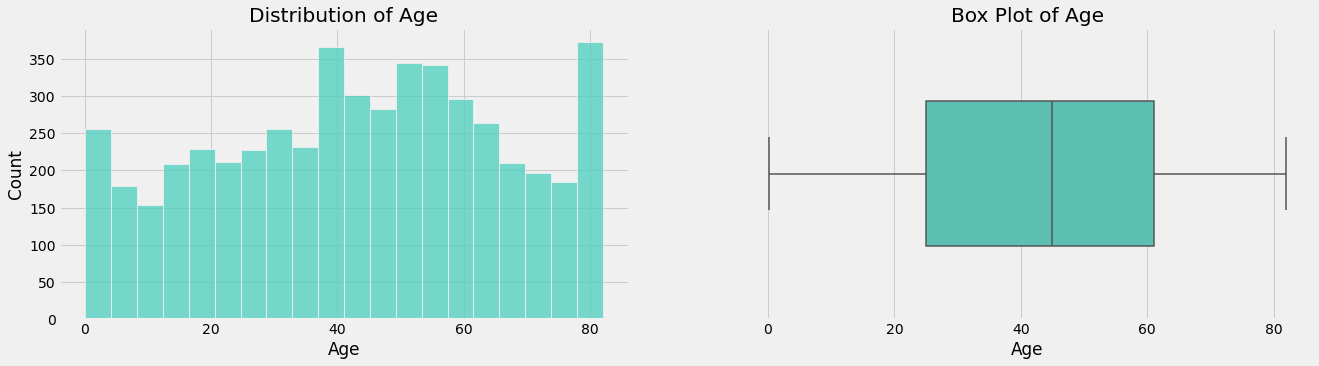

In [53]:
plot_distribution(df, 'age', 'Age')

In [136]:
compare_feature_statistics('age')

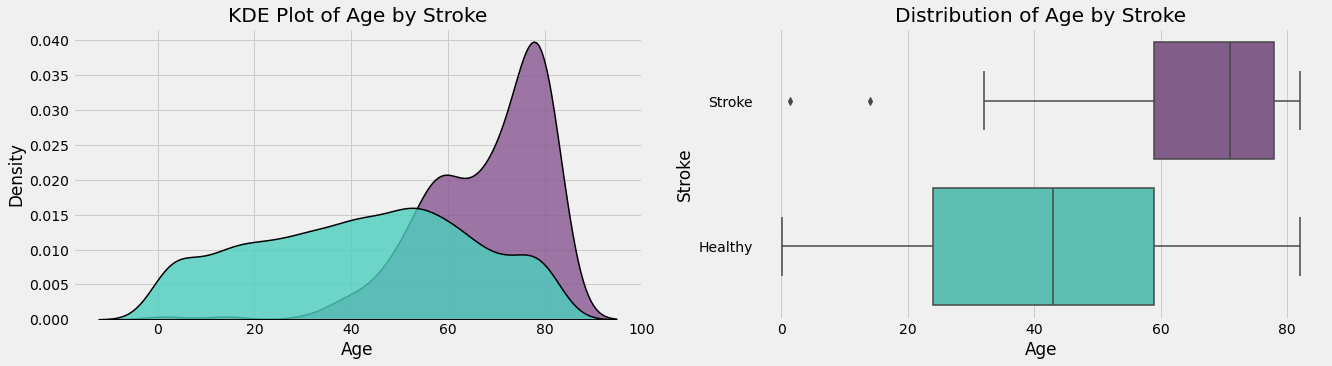

In [114]:
plot_stroke_vs_Healthy("age", "Age")

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Hypertension</h3>

**Whether or not the patient has hypertension**

In [56]:
explore_categorical_variable('hypertension')

Statistics Values
0               Data Type  int64
1                   Count   5109
2                    Mode      0
3  Num of Possible values      2

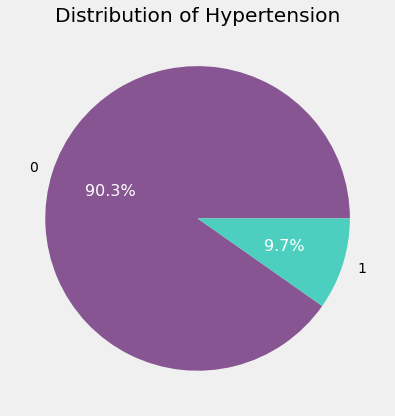

In [60]:
pie_plot(df, 'hypertension', 'Hypertension', colors=['#875692','#4ccfbe'])

In [58]:
explore_categories('hypertension',[0.1])

hypertension  Count  Percentage
0             0   4611       90.25
1             1    498        9.75

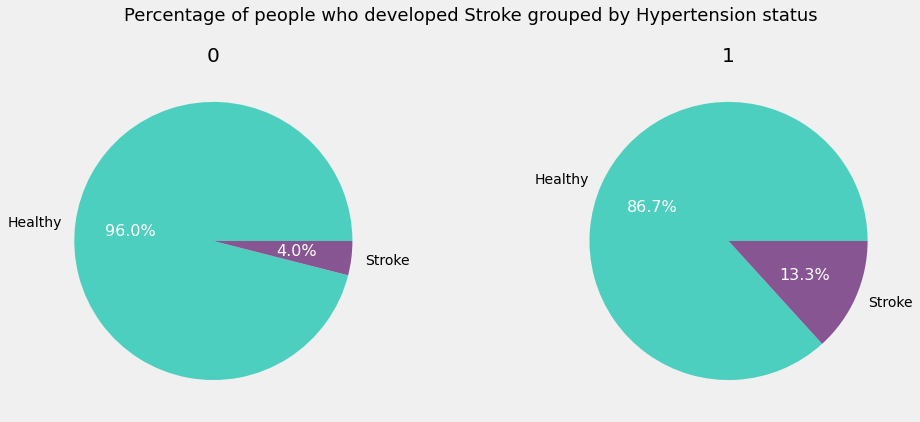

In [59]:
pie_with_target(df, 'hypertension', 'Hypertension')

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Heart disease</h3>

**Whether or not the patient has heart disease**

In [61]:
explore_categorical_variable('heart_disease')

Statistics Values
0               Data Type  int64
1                   Count   5109
2                    Mode      0
3  Num of Possible values      2

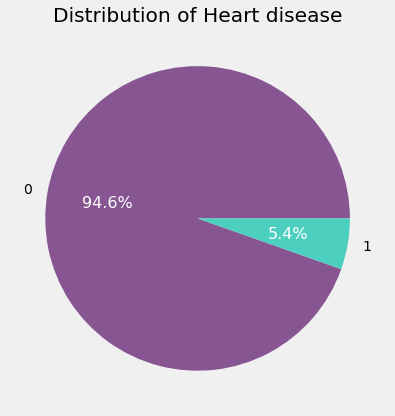

In [64]:
pie_plot(df, 'heart_disease', 'Heart disease', colors=['#875692','#4ccfbe'])

In [65]:
explore_categories('heart_disease',[0.1])

heart_disease  Count  Percentage
0              0   4833        94.6
1              1    276         5.4

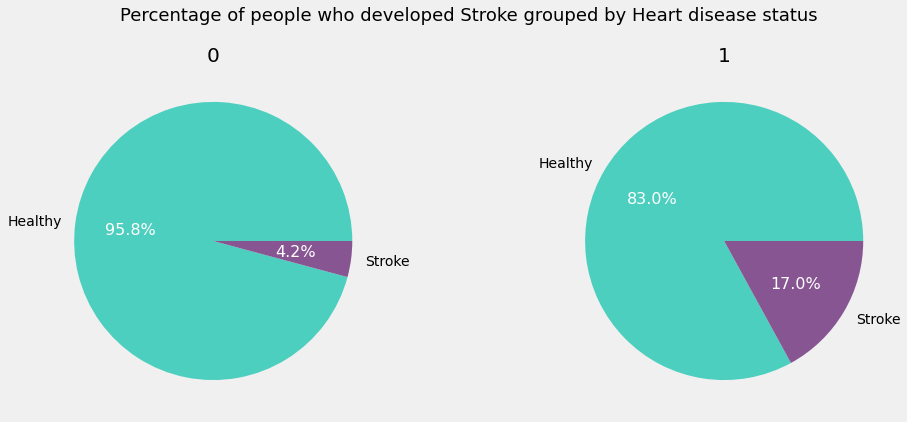

In [67]:
pie_with_target(df, 'heart_disease', 'Heart disease')

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Ever married</h3>

**Whether or not the patient has ever been married**

In [68]:
explore_categorical_variable('ever_married')

Statistics  Values
0               Data Type  object
1                   Count    5109
2                    Mode     Yes
3  Num of Possible values       2

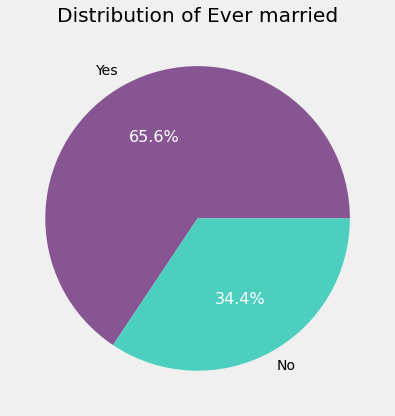

In [69]:
pie_plot(df, 'ever_married', 'Ever married', colors=['#875692','#4ccfbe'])

In [70]:
explore_categories('ever_married',['Yes','No'])

ever_married  Count  Percentage
0          Yes   3353       65.63
1           No   1756       34.37

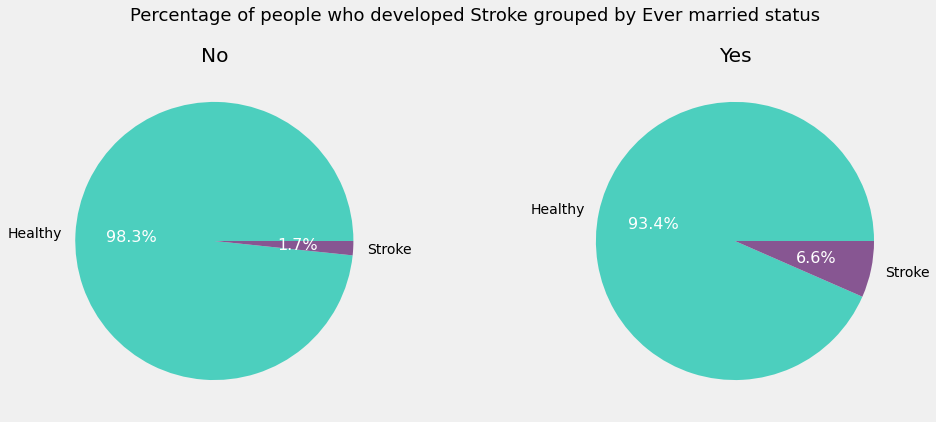

In [71]:
pie_with_target(df, 'ever_married', 'Ever married')

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Work type</h3>

**Type of occupation**

In [72]:
explore_categorical_variable('work_type')

Statistics   Values
0               Data Type   object
1                   Count     5109
2                    Mode  Private
3  Num of Possible values        5

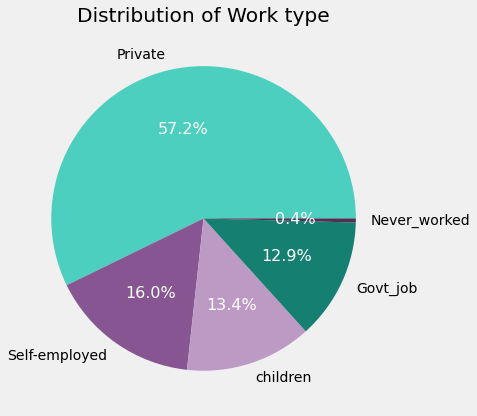

In [74]:
pie_plot(df, 'work_type', 'Work type', colors=['#4ccfbe','#875692','#bc9ac4','#158072','#4e3254'])

In [75]:
explore_categories('work_type',['Private' , 'Never_worked' , 'Govt_job' , 'children' , 'Self-employed'])

work_type  Count  Percentage
0        Private   2924       57.23
1  Self-employed    819       16.03
2       children    687       13.45
3       Govt_job    657       12.86
4   Never_worked     22        0.43

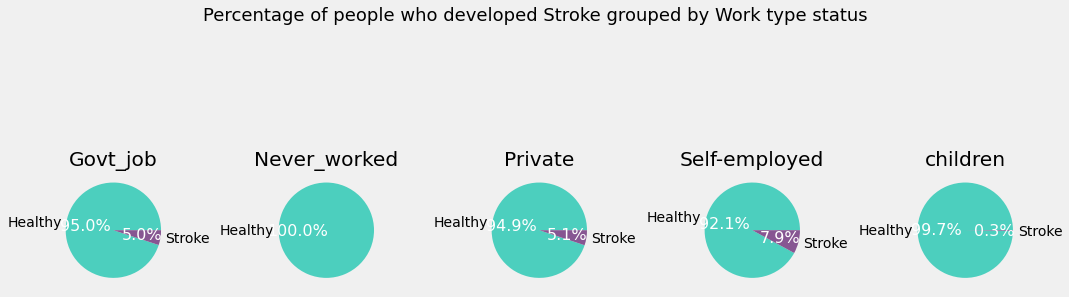

In [76]:
pie_with_target(df,'work_type', 'Work type') 

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Residence type</h3>

**Type of residence**

In [77]:
explore_categorical_variable('Residence_type')

Statistics  Values
0               Data Type  object
1                   Count    5109
2                    Mode   Urban
3  Num of Possible values       2

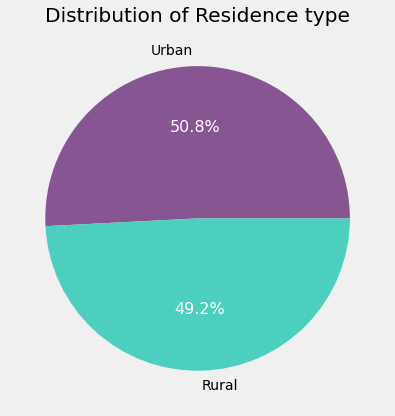

In [78]:
pie_plot(df, 'Residence_type', 'Residence type', colors=['#875692','#4ccfbe'])

In [79]:
explore_categories('Residence_type',['Rural','Urban'])

Residence_type  Count  Percentage
0          Urban   2596       50.81
1          Rural   2513       49.19

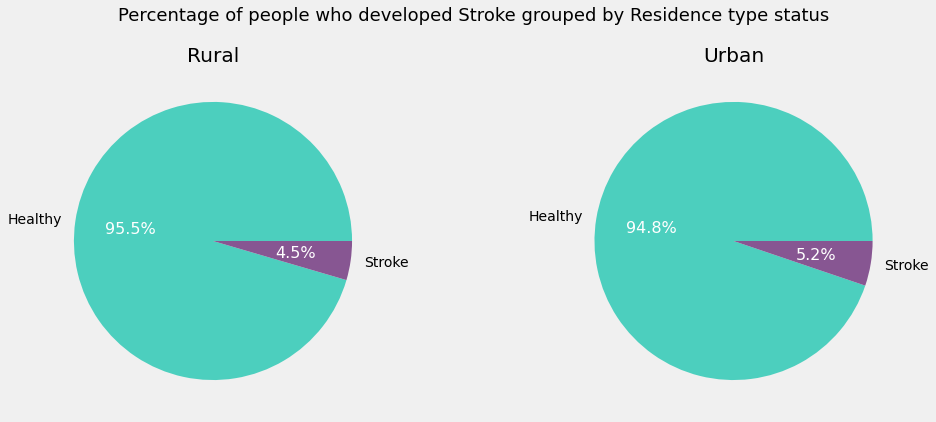

In [80]:
pie_with_target(df, 'Residence_type', 'Residence type')

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Avg glucose level</h3>

**Average glucose level in blood**

In [81]:
explore_continuous_variable('avg_glucose_level')

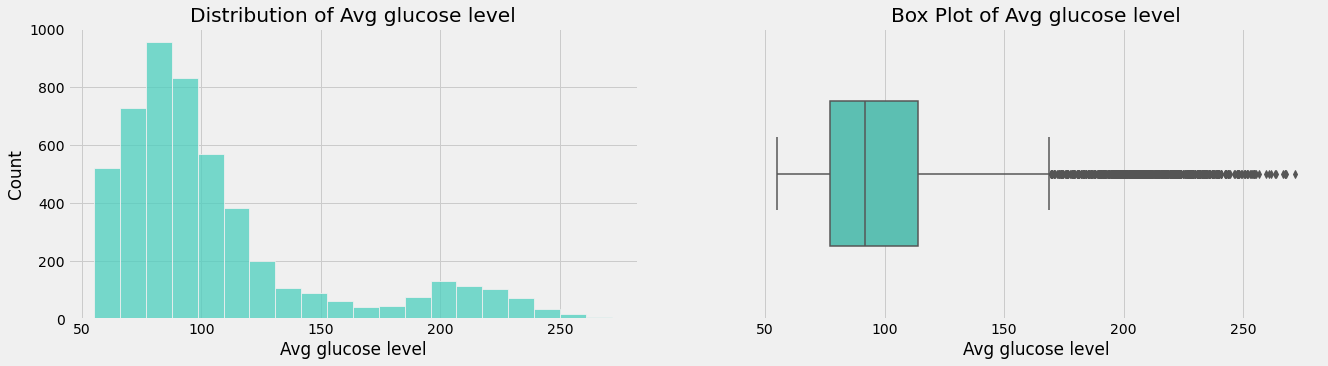

In [82]:
plot_distribution(df, 'avg_glucose_level', 'Avg glucose level')

In [137]:
compare_feature_statistics('avg_glucose_level')

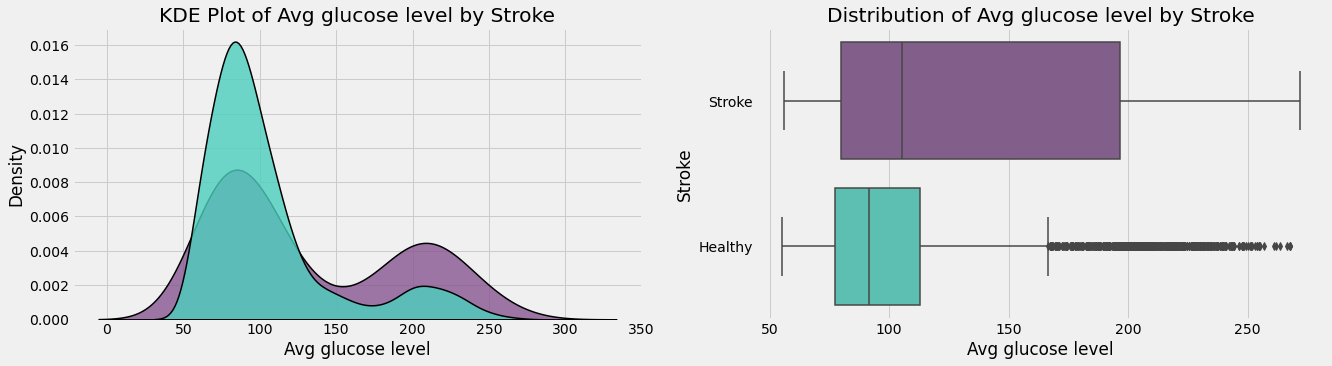

In [115]:
plot_stroke_vs_Healthy("avg_glucose_level", "Avg glucose level")

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">BMI</h3>

**Body Mass Index**

In [85]:
explore_continuous_variable('bmi')

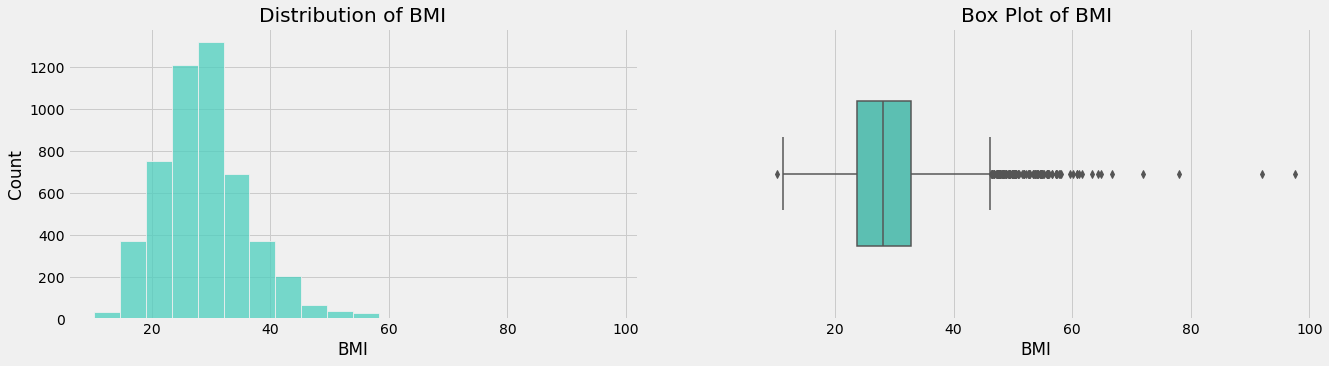

In [86]:
plot_distribution(df, 'bmi', 'BMI')

In [138]:
compare_feature_statistics('bmi')

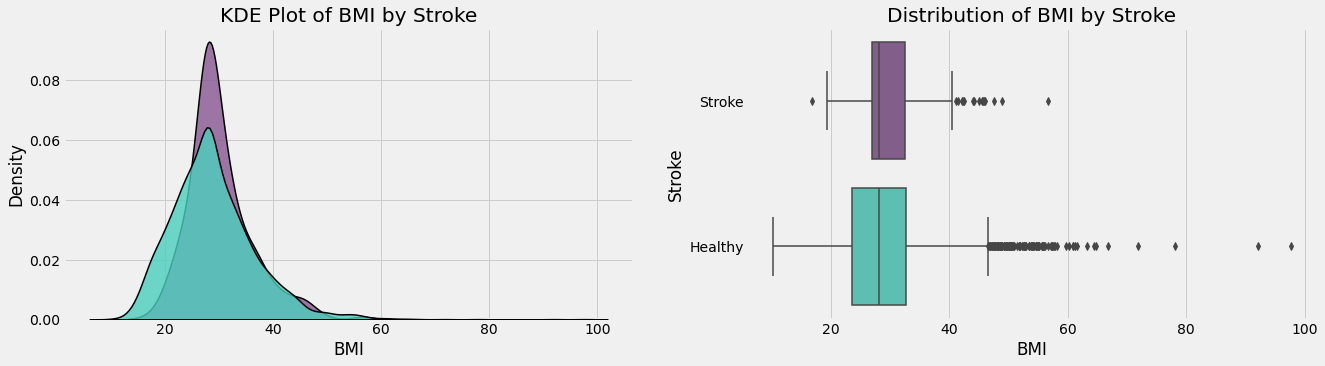

In [116]:
plot_stroke_vs_Healthy("bmi", "BMI")

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Smoking status</h3>

**Smoking status**

In [89]:
explore_categorical_variable('smoking_status')

Statistics        Values
0               Data Type        object
1                   Count          5109
2                    Mode  never smoked
3  Num of Possible values             4

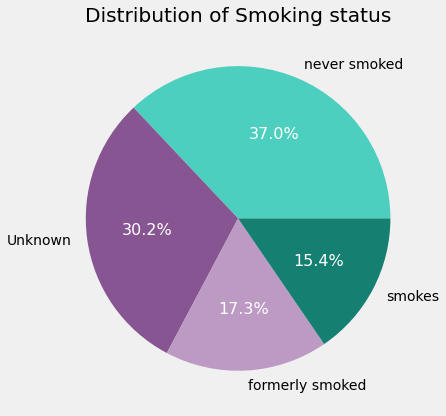

In [90]:
pie_plot(df, 'smoking_status', 'Smoking status', colors=['#4ccfbe','#875692','#bc9ac4','#158072'])

In [91]:
explore_categories('smoking_status',['never smoked' , 'Unknown' , 'smokes' , 'formerly smoked'])

smoking_status  Count  Percentage
0     never smoked   1892       37.03
1          Unknown   1544       30.22
2  formerly smoked    884       17.30
3           smokes    789       15.44

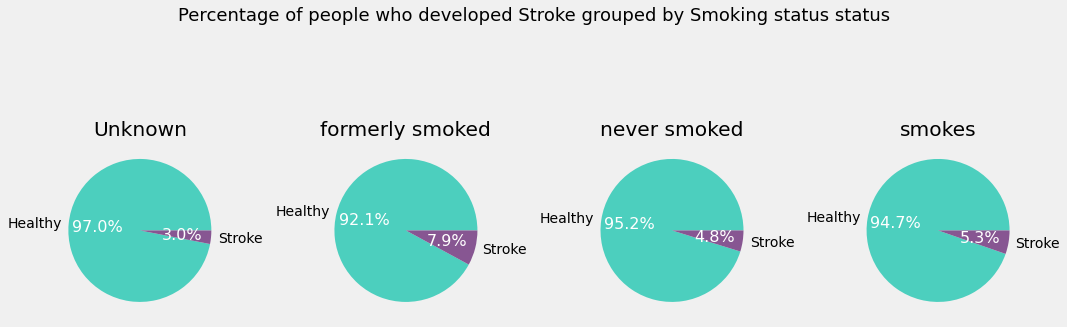

In [92]:
pie_with_target(df, 'smoking_status', 'Smoking status')

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Target</h3>

**Whether the patient had a stroke**

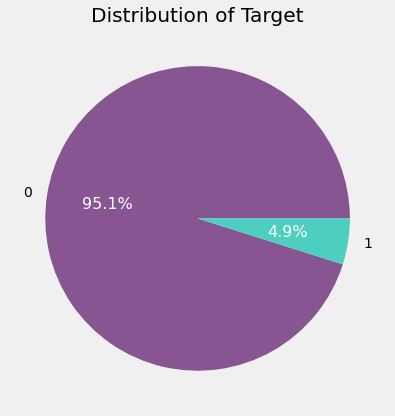

In [94]:
pie_plot(df, 'stroke', 'Target', colors=['#875692','#4ccfbe'])

# <a id="2.1"></a>
<h3 style="background-color:#c5f6ef;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Multivariate Analysis</h3>

The primary goal of this multivariate analysis is to gain deeper insights into the complex interplay of factors contributing to not only the risk of coronary heart disease, but also other risk factors and diseases. By examining the relationships between various features in the dataset, we aim to identify key risk factors and potential recommendations for cardiovascular health.

# <a id="2.1"></a>
<h3 style="background-color:#e7fbf8;font-family:newtimeroman;font-size:210%;text-align:center;border-radius: 15px 50px;">Defining Functions</h3>

In [148]:
df2 = df.copy()

In [149]:
df2['hypertension'] = df2['hypertension'].map({1: 'Patient', 0: 'Healthy'})
df2['heart_disease'] = df2['heart_disease'].map({1: 'Patient', 0: 'Healthy'})

In [150]:
def plot_continuous_vs_categorical_features(feature, categorical_feature, plot_title, df=df2):
    box_plots_colors = {'Healthy': '#4ccfbe', 'Patient':'#875692'}
    
    with plt.style.context('fivethirtyeight'):
        fig, ax = plt.subplots(1, 2, figsize=(20, 5))

        # KDE plot for the continuous feature
        sns.kdeplot(data=df[df[categorical_feature]=='Patient'], x=feature, color='#875692', fill=True, linewidth=1.5, ec='black', alpha=0.8, zorder=3, ax=ax[0])
        sns.kdeplot(data=df[df[categorical_feature]=='Healthy'], x=feature, color='#4ccfbe', fill=True, linewidth=1.5, ec='black', alpha=0.8, zorder=3, ax=ax[0])

        ax[0].set_title(f"KDE Plot of {plot_title}")
        ax[0].set_xlabel(feature)
        ax[0].set_ylabel('Density')

        # Box plot for the continuous feature
        sns.boxplot(x=feature,
                    data=df,
                    y=categorical_feature,
                    linewidth=1.5,
                    palette=box_plots_colors,
                    ax=ax[1]).set_title(f"Distribution of {plot_title}")
        ax[1].set_xlabel(feature)
        ax[1].set_ylabel(categorical_feature)

        plt.show()

In [183]:
def compare_categorical_percentage(df, group_feature, grouped_by, titles, overall_title):
    # Calculate percentage of people for each category in grouped_by for each group
    grouped = df.groupby(group_feature)[grouped_by].value_counts(normalize=True).rename('percentage').mul(100).reset_index()

    # Define custom color palette
    custom_palette = {0: '#4ccfbe', 1: '#875692'}
    # Define custom legend labels
    legend_labels = {0: f'Not {grouped_by}', 1: grouped_by}

    with plt.style.context('fivethirtyeight'):
        fig, axs = plt.subplots(2, 2, figsize=(15, 12))  # Adjust for a 2x2 grid of pie charts
        axs = axs.flatten()  # Flatten the array for easier indexing

        for i, group_status in enumerate(grouped[group_feature].unique()):
            data = grouped[grouped[group_feature] == group_status]
            wedges, texts, autotexts = axs[i].pie(data['percentage'], labels=[legend_labels[status] for status in data[grouped_by]],
                                                 colors=[custom_palette[status] for status in data[grouped_by]],
                                                 autopct='%1.1f%%', startangle=140)
            axs[i].set_title(titles[i])  # Use custom titles for each pie chart
            plt.setp(autotexts, size=12, color="w")

        # Adjust the legend
        fig.legend(wedges, legend_labels.values(), loc="center right")
        plt.subplots_adjust(right=0.85)  # Adjust spacing to fit the legend

        # Set overall title
        fig.suptitle(f'Percentage of people who are {grouped_by} based on {overall_title} statues')

In [154]:
def compare_feature_statistics2(feature, group_by, data=df):
    # Extract the column for Stroke and Healthy individuals
    Group_by_column_1 = data[data[group_by] == 1][feature]
    Group_by_column_0 = data[data[group_by] == 0][feature]

    # Basic statistics for the presence og group by feature
    feature_mean = int(Group_by_column_1.mean())
    feature_median = int(Group_by_column_1.median())
    feature_min = int(Group_by_column_1.min())
    feature_max = int(Group_by_column_1.max())
    feature_std_deviation = round(Group_by_column_1.std(), 2)
    feature_iqr = int(Group_by_column_1.quantile(0.75) - Group_by_column_1.quantile(0.25))

    # Basic statistics for the absence of group by feature
    no_feature_mean = int(Group_by_column_0.mean())
    no_feature_median = int(Group_by_column_0.median())
    no_feature_min = int(Group_by_column_0.min())
    no_feature_max = int(Group_by_column_0.max())
    no_feature_std_deviation = round(Group_by_column_0.std(), 2)
    no_feature_iqr = int(Group_by_column_0.quantile(0.75) - Group_by_column_0.quantile(0.25))

    # Create a DataFrame to store the results
    results_df = pd.DataFrame({
        f'{feature} Statistics': ['Mean', 'Median', 'Min', 'Max', 'Std Deviation', 'IQR'],
        f'{group_by}': [feature_mean, feature_median, feature_min, feature_max, feature_std_deviation, feature_iqr],
        f'Not {group_by}': [no_feature_mean, no_feature_median, no_feature_min, no_feature_max, no_feature_std_deviation, no_feature_iqr]
    })

    results_df = results_df.set_index(f'{feature} Statistics')
    
    results_df = results_df.astype(int)

    # Create a Styler object
    styled_df = results_df.style.set_properties(**{'text-align': 'center'})

    return styled_df

# <a id="2.1"></a>
<h3 style="background-color:#e7fbf8;font-family:newtimeroman;font-size:210%;text-align:center;border-radius: 15px 50px;">Age & Risk Factors Development</h3>

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Age & Hypertension</h3>

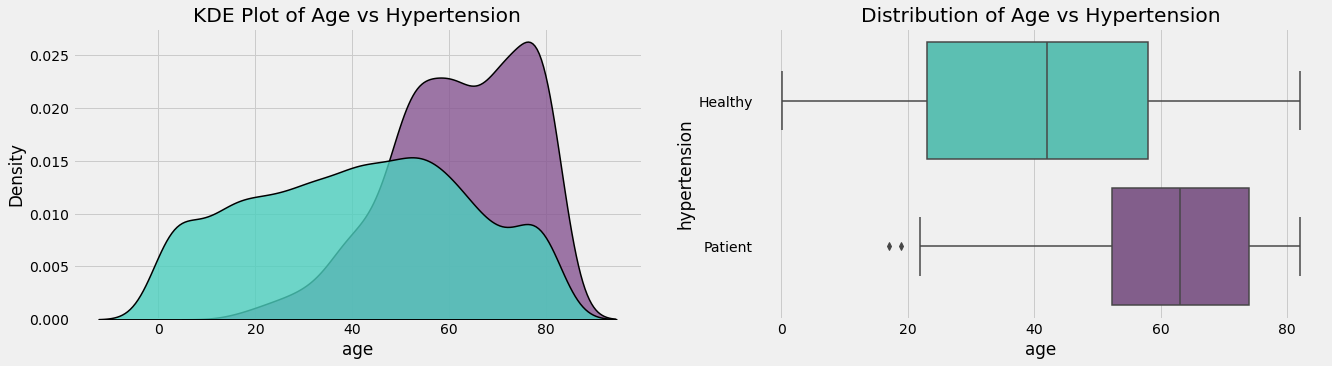

In [156]:
plot_continuous_vs_categorical_features('age', 'hypertension', 'Age vs Hypertension')

In [157]:
compare_feature_statistics2('age', 'hypertension')

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Age & Heart disease</h3>

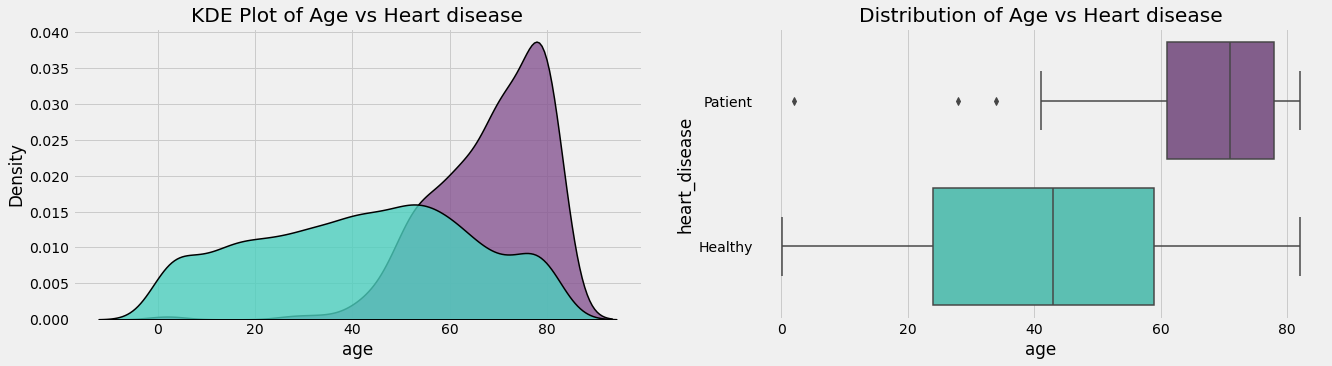

In [202]:
plot_continuous_vs_categorical_features('age', 'heart_disease', 'Age vs Heart disease')

In [159]:
compare_feature_statistics2('age', 'heart_disease')

# <a id="2.1"></a>
<h3 style="background-color:#e7fbf8;font-family:newtimeroman;font-size:210%;text-align:center;border-radius: 15px 50px;">BMI & Risk Factors Development</h3>

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">BMI & Hypertension</h3>

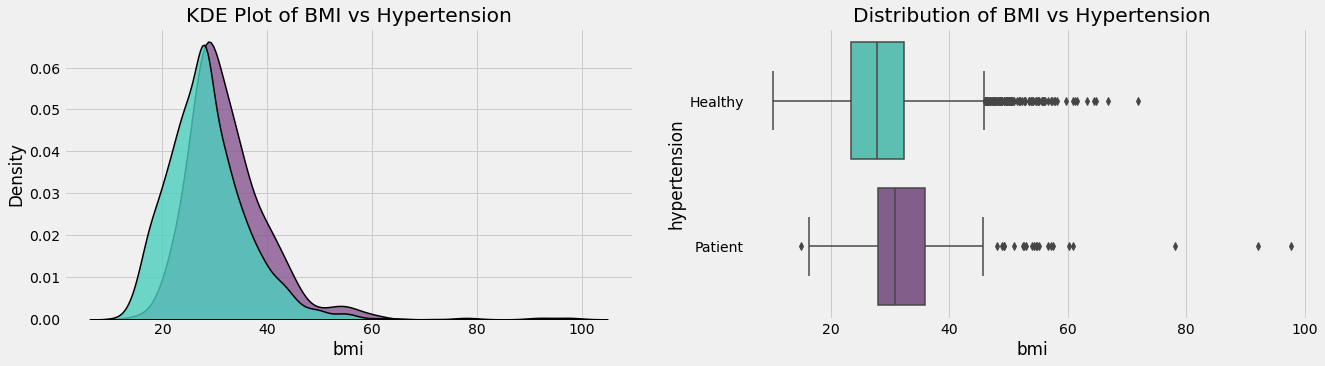

In [168]:
plot_continuous_vs_categorical_features('bmi', 'hypertension', 'BMI vs Hypertension')

In [166]:
compare_feature_statistics2('bmi', 'hypertension')

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">BMI & Heart disease</h3>

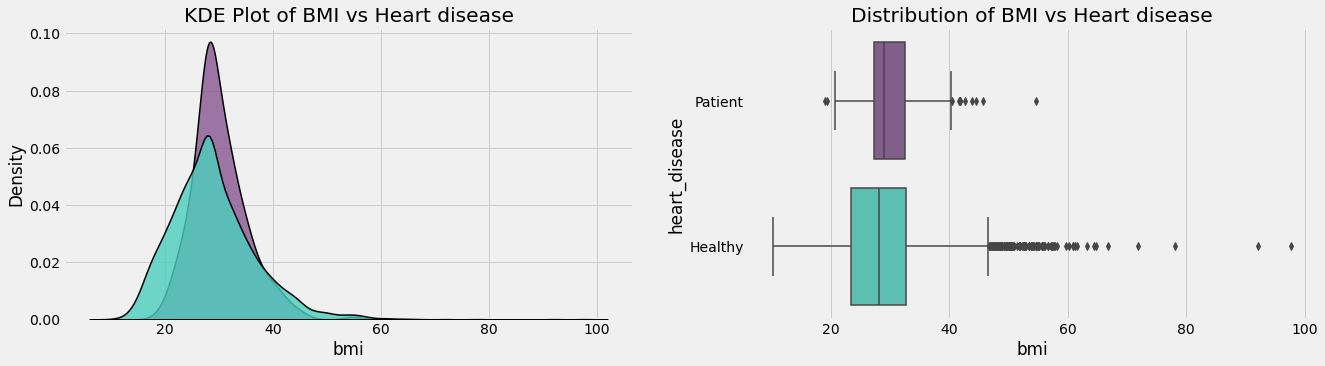

In [203]:
plot_continuous_vs_categorical_features('bmi', 'heart_disease', 'BMI vs Heart disease')

In [163]:
compare_feature_statistics2('bmi', 'heart_disease')

# <a id="2.1"></a>
<h3 style="background-color:#e7fbf8;font-family:newtimeroman;font-size:210%;text-align:center;border-radius: 15px 50px;">Glucose levels & Risk Factors Development</h3>

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Glucose Level & Hypertension</h3>

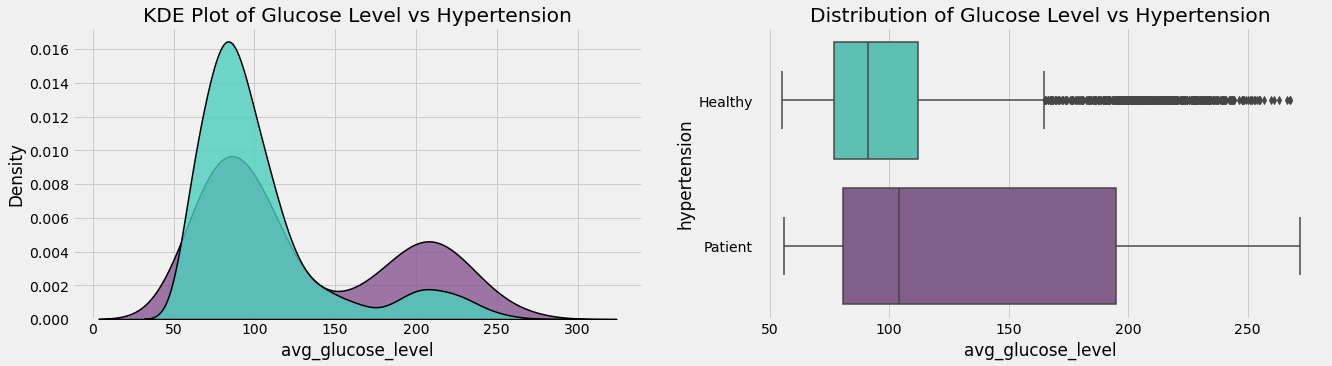

In [169]:
plot_continuous_vs_categorical_features('avg_glucose_level', 'hypertension', 'Glucose Level vs Hypertension')

In [170]:
compare_feature_statistics2('avg_glucose_level', 'hypertension')

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Glucose Level & Heart disease</h3>

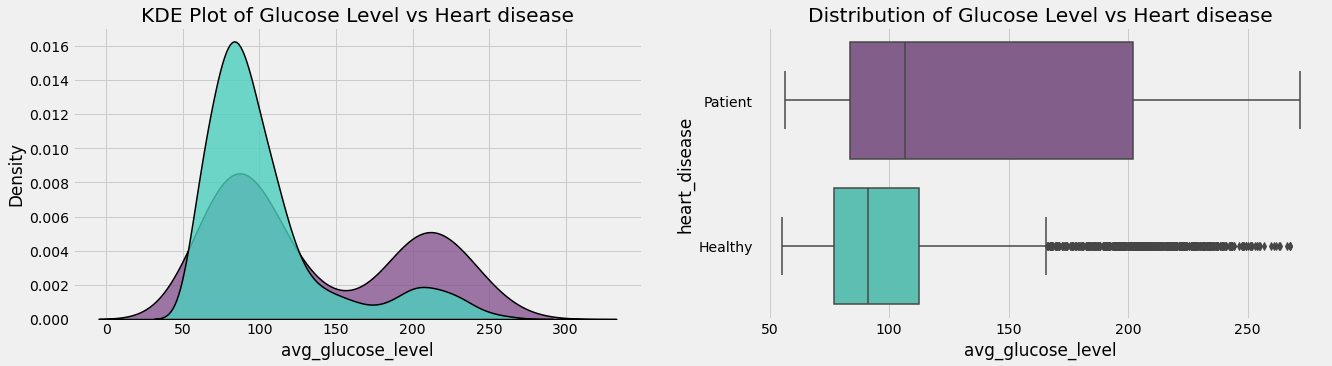

In [204]:
plot_continuous_vs_categorical_features('avg_glucose_level', 'heart_disease', 'Glucose Level vs Heart disease')

In [172]:
compare_feature_statistics2('avg_glucose_level', 'heart_disease')

# </a>
<h3 style="background-color:#e7fbf8;font-family:newtimeroman;font-size:210%;text-align:center;border-radius: 15px 50px;">Smoking & Risk Factors Development</h3>

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Smoking & Hypertension</h3>

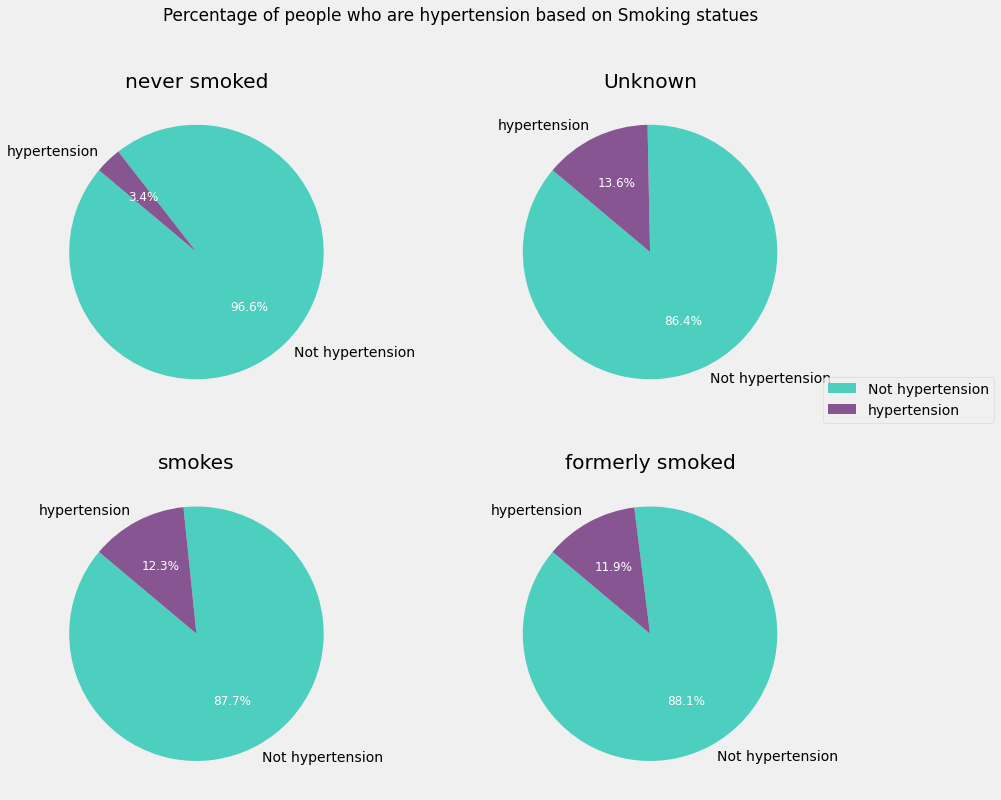

In [189]:
compare_categorical_percentage(df, 'smoking_status', 'hypertension', ['never smoked' , 'Unknown' , 'smokes' , 'formerly smoked'], 'Smoking')

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Smoking & Heart disease</h3>

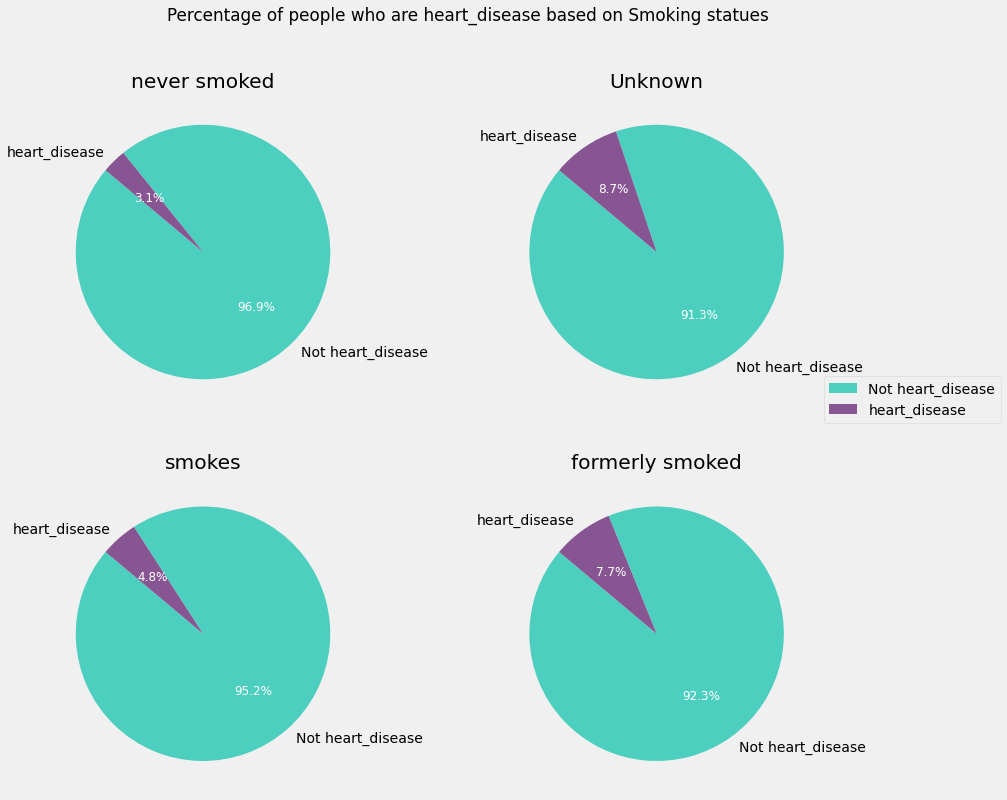

In [190]:
compare_categorical_percentage(df, 'smoking_status', 'heart_disease', ['never smoked' , 'Unknown' , 'smokes' , 'formerly smoked'], 'Smoking')

# <a id="2.1"></a>
<h3 style="background-color:#c5f6ef;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Statistical & Hypothesis Tests</h3>

# </a>
<h3 style="background-color:#e7fbf8;font-family:newtimeroman;font-size:210%;text-align:center;border-radius: 15px 50px;">Anova Test</h3>

The ANOVA test is used to analyze whether there are significant differences in means between groups. In our case, we are comparing the means of the continuous features such as : age, BMI, blood pressure ...etc across different groups defined by the categorical features such as : CHD. Diabetes, hypertension ...etc

The results of anova test involve :
- F-Statistic: It measures the ratio of the between-group variability to the within-group variability. Higher values of the F-statistic indicate larger differences between the group means.
- p-value: It represents the probability of observing the F-statistic or a more extreme value if the null hypothesis (no difference between group means) is true. A small p-value (typically less than 0.05) suggests strong evidence against the null hypothesis.

In [193]:
column = list(df.columns)
categorical_features = []
continuous_features = []
for i in column:
    if len(df[i].unique()) > 6:
        continuous_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('continuous Features :',*continuous_features)

Categorical Features : gender hypertension heart_disease ever_married work_type Residence_type smoking_status stroke
continuous Features : age avg_glucose_level bmi


In [199]:
def perform_anova_test(df, categorical_feature):

    # Perform ANOVA for each continuous feature
    anova_results = []
    for continuous_feature in continuous_features:
        groups = []
        for group_name, group_data in df.groupby(categorical_feature):
            groups.append(group_data[continuous_feature].values)
        
        anova_result = stats.f_oneway(*groups)
        anova_results.append((continuous_feature, round(anova_result.statistic,2), anova_result.pvalue))
    
    # Create a DataFrame from the ANOVA results
    anova_results_df = pd.DataFrame(anova_results, columns=['Continuous Feature', 'F-Statistic', 'p-value'])
    
    # Set the Continuous Feature column as the index
    anova_results_df.set_index('Continuous Feature', inplace=True)
    
    # Sort the DataFrame by p-value in ascending order
    anova_results_df = anova_results_df.sort_values('p-value')
    
    return anova_results_df

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Stroke</h3>

In [200]:
perform_anova_test(df, 'stroke')

F-Statistic       p-value
Continuous Feature                           
age                      326.80  7.435469e-71
avg_glucose_level         90.55  2.705303e-21
bmi                        6.66  9.914907e-03

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Hypertension</h3>

In [201]:
perform_anova_test(df, 'hypertension')

F-Statistic       p-value
Continuous Feature                           
age                      422.32  3.118297e-90
avg_glucose_level        160.47  3.119304e-36
bmi                      131.18  5.235111e-30

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Heart disease</h3>

In [205]:
perform_anova_test(df, 'heart_disease')

F-Statistic       p-value
Continuous Feature                           
age                      381.91  4.462453e-82
avg_glucose_level        137.48  2.382874e-31
bmi                        6.96  8.382215e-03

# </a>
<h3 style="background-color:#e7fbf8;font-family:newtimeroman;font-size:210%;text-align:center;border-radius: 15px 50px;">Chi squared Test</h3>

The chi-square test is a statistical test used to determine if there is a significant association between two categorical variables. It helps us understand whether the observed frequencies of categories in the variables differ significantly from what we would expect by chance.

The chi-square test allows us to examine relationships between categorical variables and identify any patterns or dependencies. It helps answer questions such as:

- Are two categorical variables related or independent?
- Are there any significant associations between categories in the variables?

Higher chi-square values indicate a greater deviation from the expected frequencies, suggesting a stronger association between the categorical feature and the target feature.

In [207]:
def perform_chi_square_test(target_feature, categorical_features=categorical_features, df=df):
    categorical_features = [feature for feature in categorical_features if feature != target_feature]

    chi_square_results = []
    for feature in categorical_features:
        contingency_table = pd.crosstab(df[feature], df[target_feature])
        chi2, _, _, expected = chi2_contingency(contingency_table, correction=False)
        chi_square_results.append((feature, round(chi2, 2), expected))

    chi_square_results_df = pd.DataFrame(chi_square_results, columns=['Categorical Feature', 'Chi-Square', 'Expected Frequencies'])
    chi_square_results_df.set_index('Categorical Feature', inplace=True)
    chi_square_results_df = chi_square_results_df.sort_values('Chi-Square', ascending=False)

    return chi_square_results_df

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Stroke</h3>

In [208]:
perform_chi_square_test('stroke')

Chi-Square  \
Categorical Feature               
heart_disease             92.98   
hypertension              83.56   
ever_married              59.92   
work_type                 49.16   
smoking_status            29.23   
Residence_type             1.21   
gender                     0.42   

                                                  Expected Frequencies  
Categorical Feature                                                     
heart_disease        [[4597.45155607751, 235.54844392248972], [262....  
hypertension         [[4386.271285965942, 224.72871403405753], [473...  
ever_married         [[1670.416911332942, 85.58308866705814], [3189...  
work_type            [[624.9794480328832, 32.02055196711685], [20.9...  
smoking_status       [[1468.7492660011744, 75.2507339988256], [840....  
Residence_type       [[2390.5226071638285, 122.47739283617146], [24...  
gender               [[2848.0798590722256, 145.92014092777453], [20...

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Hypertension</h3>

In [209]:
perform_chi_square_test('hypertension')

Chi-Square  \
Categorical Feature               
ever_married             137.72   
work_type                135.17   
smoking_status           103.96   
stroke                    83.56   
heart_disease             59.91   
gender                     2.30   
Residence_type             0.33   

                                                  Expected Frequencies  
Categorical Feature                                                     
ever_married         [[1584.8338226658836, 171.16617733411627], [30...  
work_type            [[592.9588960657663, 64.0411039342337], [19.85...  
smoking_status       [[1393.4985320023488, 150.5014679976512], [797...  
stroke               [[4386.271285965942, 473.72871403405753], [224...  
heart_disease        [[4361.903112155021, 471.09688784497945], [249...  
gender               [[2702.159718144451, 291.84028185554905], [190...  
Residence_type       [[2268.045214327657, 244.95478567234292], [234...

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Heart disease</h3>

In [210]:
perform_chi_square_test('heart_disease')

Chi-Square  \
Categorical Feature               
stroke                    92.98   
work_type                 70.69   
ever_married              67.10   
hypertension              59.91   
smoking_status            44.74   
gender                    37.51   
Residence_type             0.05   

                                                  Expected Frequencies  
Categorical Feature                                                     
stroke               [[4597.45155607751, 262.5484439224897], [235.5...  
work_type            [[621.507339988256, 35.49266001174398], [20.81...  
ever_married         [[1661.1368173810922, 94.86318261890781], [317...  
hypertension         [[4361.903112155021, 249.09688784497945], [471...  
smoking_status       [[1460.5895478567234, 83.41045214327657], [836...  
gender               [[2832.257193188491, 161.7428068115091], [2000...  
Residence_type       [[2377.241926012918, 135.75807398708162], [245...

# <a id="2.1"></a>
<h3 style="background-color:#c5f6ef;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Outliers handling discussion</h3>

During our examination of the dataset, we observed the presence of outliers in various features, as indicated by statistical measures such as box plots and histograms we have built before. These outliers were defined as values that **exceeded the range of Q3 + 1.5 IQR (interquartile range) or were below Q1 - 1.5 IQR**. However, we subsequently engaged in discussions with domain experts in the medical field to gain a deeper understanding of these outliers.

The insights provided by **medical domain experts** played a crucial role in our decision-making process. We learned that the outliers we initially identified actually represent valid and plausible data points that **can exist in the real world. These values are not errors or noise but rather reflect extreme occurrences** that can contribute to a comprehensive understanding of the factors associated with CHD.

Based on these discussions and the validation of the outliers, we have made the **informed decision to retain them in our analysis**.

By doing so, we aim to **capture the full range of real-world scenarios and avoid introducing bias into our findings**.

# <a id="2.1"></a>
<h3 style="background-color:#c5f6ef;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Models Development</h3>

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Importing Libraries</h3>

In [247]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
import joblib
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, precision_recall_curve, cohen_kappa_score, matthews_corrcoef

In [248]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Data Scaling</h3>

In [249]:
categorical = [col for col in df.columns if df[col].dtype == "O"]
categorical

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [250]:
numerical = [col for col in df.columns if df[col].dtype != "O"]
numerical = numerical[0:-1]
numerical

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

In [252]:
X = df.drop('stroke', axis=1)
Y = df['stroke']

X_train , X_test , Y_train , Y_test = train_test_split(X, Y, test_size=0.15, random_state=42, stratify=Y)

pipeline = ColumnTransformer([("scaler", StandardScaler() ,numerical ),
                               ("encoder", OneHotEncoder() , categorical)
                             ])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test) 

In [253]:
joblib.dump(pipeline, "pipeline.joblib")

['pipeline.joblib']

In [254]:
pipeline

ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                 ['age', 'hypertension', 'heart_disease',
                                  'avg_glucose_level', 'bmi']),
                                ('encoder', OneHotEncoder(),
                                 ['gender', 'ever_married', 'work_type',
                                  'Residence_type', 'smoking_status'])])

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Oversampling using SMOTE</h3>

In [255]:
# Apply SMOTE to oversample the minority class of training data
smote = SMOTE(random_state=42)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Modeling</h3>

In [304]:
def evaluate_classifier(name, classifier, params, X_train=X_train, Y_train=Y_train, X_test=X_test, Y_test=Y_test):
    cv = GridSearchCV(classifier, params, cv=3)
    cv.fit(X_train, Y_train)

    # Predict the target variable for the test set
    Y_pred = cv.predict(X_test)
    Y_prob = cv.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

    # Compute metrics
    accuracy = cv.score(X_test, Y_test)
    f1 = f1_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)

    # Print the metrics
    print(f'Classifier: {name}')
    print(f'Best Parameters: {cv.best_params_}')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'F1 Score: {f1:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(classification_report(Y_test, Y_pred))

    # Confusion Matrix
    cm = confusion_matrix(Y_test, Y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # ROC & AUC Curve
    fpr, tpr, _ = roc_curve(Y_test, Y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, color='#593961', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Precision-Recall Curve
    precision_vals, recall_vals, _ = precision_recall_curve(Y_test, Y_prob)
    plt.figure(figsize=(6, 6))
    plt.plot(recall_vals, precision_vals, color='#126f63', lw=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.show()

# <a id="2.1"></a>
<h3 style="background-color:#c5f6ef;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Data Correlation</h3>

In [313]:
df['gender'] = df['gender'].map({'Male' : 1 , 'Female' : 0})

df['ever_married'] = df['ever_married'].map({'Yes' : 1 , 'No' : 0})

df['work_type'] = df['work_type'].map({'Private' : 1 , 'Self-employed' : 2 ,
                                       'Govt_job' : 3     , 'children' : 4 , 'Never_worked' : 5 }) 

df['Residence_type'] = df['Residence_type'].map({'Urban' : 1 , 'Rural' : 2})

df['smoking_status'] = df['smoking_status'].map({'never smoked' : 1 , 'smokes' : 2 ,
                                       'formerly smoked' : 3     , 'Unknown' : 4 })

In [314]:
df.corr()

gender       age  hypertension  heart_disease  \
gender             1.000000 -0.027752      0.021223       0.085685   
age               -0.027752  1.000000      0.276367       0.263777   
hypertension       0.021223  0.276367      1.000000       0.108292   
heart_disease      0.085685  0.263777      0.108292       1.000000   
ever_married      -0.030171  0.679084      0.164187       0.114601   
work_type          0.065848 -0.413428     -0.075150      -0.058301   
Residence_type     0.006105 -0.014031      0.007980      -0.003045   
avg_glucose_level  0.054722  0.238323      0.174540       0.161907   
bmi               -0.026452  0.324211      0.158252       0.036879   
smoking_status     0.094314 -0.250318     -0.110418      -0.020187   
stroke             0.009081  0.245239      0.127891       0.134905   

                   ever_married  work_type  Residence_type  avg_glucose_level  \
gender                -0.030171   0.065848        0.006105           0.054722   
age                    0.679084  -0.413428       -0.014031           0.238323   
hypertension           0.164187  -0.075150        0.007980           0.174540   
heart_disease          0.114601  -0.058301       -0.003045           0.161907   
ever_married           1.000000  -0.376238       -0.005988           0.155329   
work_type             -0.376238   1.000000       -0.014426          -0.068023   
Residence_type        -0.005988  -0.014426        1.000000           0.004783   
avg_glucose_level      0.155329  -0.068023        0.004783           1.000000   
bmi                    0.334770  -0.341665        0.000444           0.167033   
smoking_status        -0.230048   0.309608       -0.010290          -0.058142   
stroke                 0.108299  -0.058261       -0.015415           0.131991   

                        bmi  smoking_status    stroke  
gender            -0.026452        0.094314  0.009081  
age                0.324211       -0.250318  0.245239  
hypertension       0.158252       -0.110418  0.127891  
heart_disease      0.036879       -0.020187  0.134905  
ever_married       0.334770       -0.230048  0.108299  
work_type         -0.341665        0.309608 -0.058261  
Residence_type     0.000444       -0.010290 -0.015415  
avg_glucose_level  0.167033       -0.058142  0.131991  
bmi                1.000000       -0.203276  0.036075  
smoking_status    -0.203276        1.000000 -0.019756  
stroke             0.036075       -0.019756  1.000000

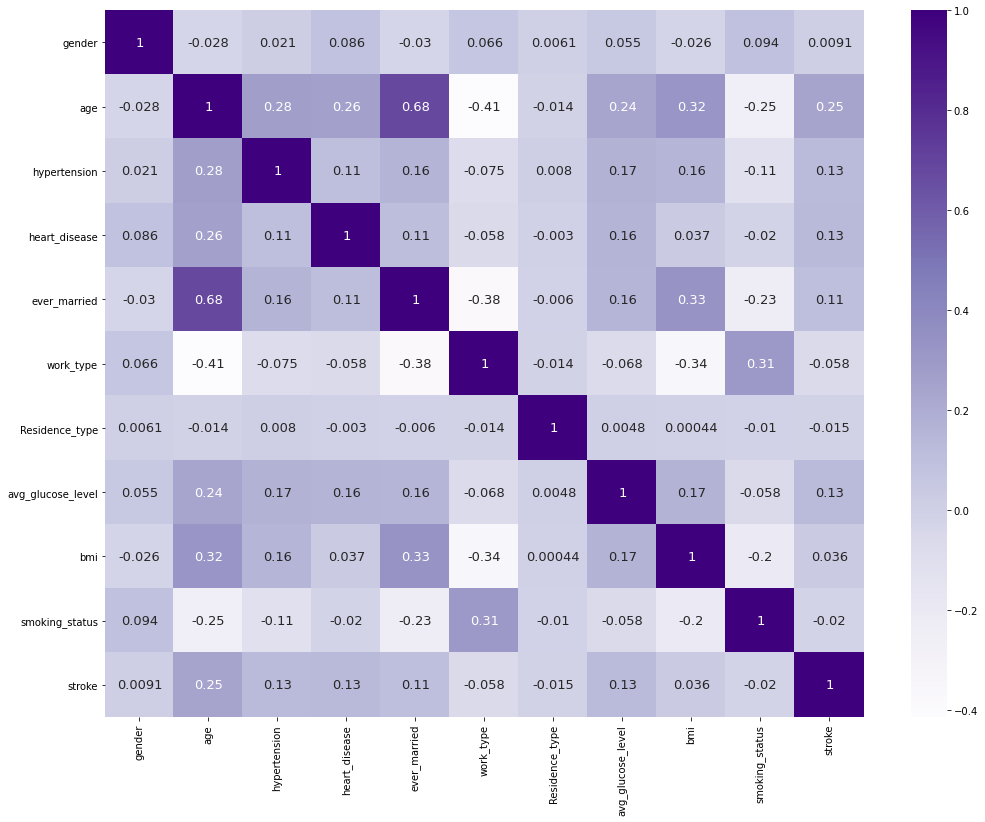

In [315]:
plt.figure(figsize=(17,13))
sns.heatmap(df.corr(), annot=True, annot_kws={"size": 13},cmap='Purples')
plt.show()

# <a id="2.1"></a>
<h3 style="background-color:#c5f6ef;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Deployment</h3>